# Setup fastf1 python interface to get some livetime data from both F1 Live for a session and from ergast.

This is from different tutorials on medium
The last section where we plot a map of the track is very interesting
See: https://medium.com/towards-formula-1-analysis/analyzing-formula-1-data-using-python-2021-abu-dhabi-gp-minisector-comparison-3d72aa39e5e8

In [2]:
import fastf1 as ff1
from fastf1 import plotting
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm
import numpy as np
import pandas as pd

# set some variables

year = 2022
race = 'Australia'
# Enable the cache and fetch the qualification timings for this race
ff1.Cache.enable_cache('cache')
quali = ff1.get_session(year, race, 'Q')
laps = quali.load_laps(with_telemetry=True)


/Users/uhellstr/opt/anaconda3/lib/python3.9/site-packages/fastf1/core.py:1095: FutureWarning: `Session.load_laps` is deprecated and will beremoved in a future version.
Use `Session.load` instead.
  warnings.warn("`Session.load_laps` is deprecated and will be"
core           INFO 	Loading data for Australian Grand Prix - Qualifying [v2.2.3]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
core           INFO 	Finished loading data for 20 drivers: ['16', '1', '11', '4', '44', '63', '3', '31', '55', '14', '10', '77', '22', '24', '47', '23', 

## Using head()

Let’s start with .head() , a function that just shows you the first 5 rows (the head) of a dataset. 
If you pass an argument, let’s say .head(10) , it will give you the first 10 rows of the dataset. 
For the last 5 rows of the dataset, you can use .tail() .

In [3]:
laps.head(100)

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
0,0 days 00:17:24.398000,16,0 days 00:01:52.575000,1,1,0 days 00:15:34.589000,NaT,0 days 00:00:46.045000,0 days 00:00:23.979000,0 days 00:00:42.551000,...,False,SOFT,1.0,True,0 days 00:15:34.589000,Ferrari,LEC,1,False,2022-04-09 06:00:34.614
1,0 days 00:18:43.789000,16,0 days 00:01:19.391000,2,1,NaT,NaT,0 days 00:00:27.539000,0 days 00:00:17.955000,0 days 00:00:33.897000,...,False,SOFT,2.0,True,0 days 00:17:24.398000,Ferrari,LEC,1,True,2022-04-09 06:02:24.423
2,0 days 00:20:56.527000,16,0 days 00:02:12.738000,3,1,NaT,NaT,0 days 00:00:47.316000,0 days 00:00:35.204000,0 days 00:00:50.218000,...,False,SOFT,3.0,True,0 days 00:18:43.789000,Ferrari,LEC,2,True,2022-04-09 06:03:43.814
3,0 days 00:22:15.408000,16,0 days 00:01:18.881000,4,1,NaT,NaT,0 days 00:00:27.152000,0 days 00:00:17.935000,0 days 00:00:33.794000,...,False,SOFT,4.0,True,0 days 00:20:56.527000,Ferrari,LEC,2,True,2022-04-09 06:05:56.552
4,0 days 00:59:17.570000,16,NaT,5,2,NaT,0 days 00:24:27.236000,0 days 00:00:47.847000,0 days 00:00:33.701000,NaT,...,False,SOFT,1.0,True,0 days 00:22:15.408000,Ferrari,LEC,52,False,2022-04-09 06:07:15.433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0 days 01:06:35.867000,44,0 days 00:01:19.316000,13,3,NaT,NaT,0 days 00:00:27.225000,0 days 00:00:18.067000,0 days 00:00:34.024000,...,False,SOFT,6.0,True,0 days 01:05:16.551000,Mercedes,HAM,1,True,2022-04-09 06:50:16.576
96,0 days 01:10:21.988000,44,NaT,14,4,NaT,0 days 01:08:02.572000,0 days 00:00:31.697000,0 days 00:00:19.863000,NaT,...,False,SOFT,1.0,True,0 days 01:06:35.867000,Mercedes,HAM,1,False,2022-04-09 06:51:35.892
97,0 days 01:11:55.974000,44,0 days 00:01:33.986000,15,4,0 days 01:10:24.040000,NaT,0 days 00:00:36.929000,0 days 00:00:18.911000,0 days 00:00:38.146000,...,False,SOFT,2.0,True,0 days 01:10:21.988000,Mercedes,HAM,1,False,2022-04-09 06:55:22.013
98,0 days 01:13:39.945000,44,0 days 00:01:43.971000,16,4,NaT,NaT,0 days 00:00:29.281000,0 days 00:00:24.852000,0 days 00:00:49.838000,...,False,SOFT,3.0,True,0 days 01:11:55.974000,Mercedes,HAM,1,True,2022-04-09 06:56:55.999


## Save qualification laptime data to file for analysis in Excel or importing to database etc.

This will save the data to the same catalog as from where you run this Notebook from.

In [4]:
laps.to_csv('data.csv')

## Format laps in other ways...

The ‘T’ stands for ‘Transform’, and what it does is it swaps the columns and the rows around. I often work with dataset that have a lot of columns, and often I cannot easily explore them all since they the middle ones are omitted on the horizontal axis in Jupyter notebooks. Running .T shows you all the columns a dataset has, including the data that’s inside those columns. You could also combine this with head() , by for example running laps.head().T .

In [5]:
laps.T

,0,1,2,3,4,5,6,7,8,9,...,329,330,331,332,333,334,335,336,337,338
Time,0 days 00:17:24.398000,0 days 00:18:43.789000,0 days 00:20:56.527000,0 days 00:22:15.408000,0 days 00:59:17.570000,0 days 01:01:09.416000,0 days 01:02:28.424000,0 days 01:06:35.778000,0 days 01:08:24.843000,0 days 01:10:02.891000,...,0 days 00:17:40.978000,0 days 00:19:13.446000,0 days 00:21:11.869000,0 days 00:22:33.241000,0 days 00:26:46.947000,0 days 00:28:43.082000,0 days 00:30:06.652000,0 days 00:43:01.773000,0 days 00:30:21.074000,0 days 00:43:01.760000
DriverNumber,16,16,16,16,16,16,16,16,16,16,...,6,6,6,6,6,6,6,6,18,18
LapTime,0 days 00:01:52.575000,0 days 00:01:19.391000,0 days 00:02:12.738000,0 days 00:01:18.881000,NaT,0 days 00:01:51.846000,0 days 00:01:19.008000,NaT,0 days 00:01:49.065000,0 days 00:01:38.048000,...,0 days 00:01:47.178000,0 days 00:01:32.468000,0 days 00:01:58.423000,0 days 00:01:21.372000,NaT,0 days 00:01:56.135000,0 days 00:01:23.570000,NaT,0 days 00:01:46.833000,NaT
LapNumber,1,2,3,4,5,6,7,8,9,10,...,1,2,3,4,5,6,7,8,1,2
Stint,1,1,1,1,2,2,2,3,3,3,...,1,1,1,1,2,2,2,2,1,1
PitOutTime,0 days 00:15:34.589000,NaT,NaT,NaT,NaT,0 days 00:59:21.910000,NaT,NaT,0 days 01:06:37.738000,NaT,...,0 days 00:15:55.755000,NaT,NaT,NaT,NaT,0 days 00:26:48.927000,NaT,NaT,0 days 00:28:36.218000,NaT
PitInTime,NaT,NaT,NaT,NaT,0 days 00:24:27.236000,NaT,NaT,0 days 01:04:07.616000,NaT,NaT,...,NaT,NaT,NaT,NaT,0 days 00:24:19.954000,NaT,NaT,0 days 00:43:01.773000,NaT,0 days 00:43:01.760000
Sector1Time,0 days 00:00:46.045000,0 days 00:00:27.539000,0 days 00:00:47.316000,0 days 00:00:27.152000,0 days 00:00:47.847000,0 days 00:00:50.351000,0 days 00:00:27.084000,0 days 00:00:36.533000,0 days 00:00:41.425000,0 days 00:00:35.785000,...,0 days 00:00:41.022000,0 days 00:00:27.870000,0 days 00:00:43.016000,0 days 00:00:27.719000,0 days 00:00:39.302000,0 days 00:00:37.840000,0 days 00:00:27.536000,0 days 00:00:48.789000,0 days 00:00:43.939000,0 days 00:00:35.103000
Sector2Time,0 days 00:00:23.979000,0 days 00:00:17.955000,0 days 00:00:35.204000,0 days 00:00:17.935000,0 days 00:00:33.701000,0 days 00:00:21.741000,0 days 00:00:17.927000,0 days 00:00:20.628000,0 days 00:00:23.732000,0 days 00:00:22.106000,...,0 days 00:00:20.098000,0 days 00:00:18.222000,0 days 00:00:22.927000,0 days 00:00:18.192000,0 days 00:00:23.929000,0 days 00:00:19.678000,0 days 00:00:18.198000,0 days 00:00:18.198000,0 days 00:00:20.806000,0 days 00:00:20.806000
Sector3Time,0 days 00:00:42.551000,0 days 00:00:33.897000,0 days 00:00:50.218000,0 days 00:00:33.794000,NaT,0 days 00:00:39.754000,0 days 00:00:33.997000,NaT,0 days 00:00:43.908000,0 days 00:00:40.157000,...,0 days 00:00:46.058000,0 days 00:00:46.376000,0 days 00:00:52.480000,0 days 00:00:35.461000,NaT,0 days 00:00:58.617000,0 days 00:00:37.836000,NaT,0 days 00:00:42.088000,NaT


## Describe the data..

The quick data-exploration function that I will show for now is describe() , which will provide you with summary statistics of all the quantitative variables within the dataset.

In [6]:
laps.describe

<bound method NDFrame.describe of                       Time DriverNumber                LapTime  LapNumber  \
0   0 days 00:17:24.398000           16 0 days 00:01:52.575000          1   
1   0 days 00:18:43.789000           16 0 days 00:01:19.391000          2   
2   0 days 00:20:56.527000           16 0 days 00:02:12.738000          3   
3   0 days 00:22:15.408000           16 0 days 00:01:18.881000          4   
4   0 days 00:59:17.570000           16                    NaT          5   
..                     ...          ...                    ...        ...   
334 0 days 00:28:43.082000            6 0 days 00:01:56.135000          6   
335 0 days 00:30:06.652000            6 0 days 00:01:23.570000          7   
336 0 days 00:43:01.773000            6                    NaT          8   
337 0 days 00:30:21.074000           18 0 days 00:01:46.833000          1   
338 0 days 00:43:01.760000           18                    NaT          2   

     Stint             PitOutTime        

## Find the fastest qualification lap

If you want to locate specific data in a DataFrame, you can use DataFrame.loc[] to find that data based on the criteria you enter. So, let’s say we want to find the fastest lap. What we can do is find the fastest laptime using min(), and obtain the row that belongs to that fastest laptime using loc[]. Let me show you!

What we’re basically telling Python to do is the following: “give us the row where the LapTime equals the lowest LapTime you can find”. The criterion we give to select the data we need is laps['LapTime'] == min(laps['LapTime']) , so basically Pandas will return us the row where the LapTime equals the lowest LapTime there is (so, the fastest lap). We also need to add dropna() to it, since there are some missing laptimes (NaN — Not A Number) which should not be taken into account.

In [7]:
laps.loc[laps['LapTime'] == min(laps['LapTime'].dropna())]

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate,LapStartDate
19,0 days 01:47:16.360000,16,0 days 00:01:17.868000,20,5,NaT,NaT,0 days 00:00:26.740000,0 days 00:00:17.786000,0 days 00:00:33.342000,...,True,SOFT,4.0,True,0 days 01:45:58.492000,Ferrari,LEC,1,True,2022-04-09 07:30:58.517


## Find tyre compund used during qualification.

Another really easy and extremely relevant trick to apply using Pandas is value_counts() . Let’s say you want to know which tyre during a race was the most popular. You could measure this by counting the total number of laps that were driven on each compound. This can be achieved through an extremely simple one-liner:

What we are asking our program to do is actually really straightforward: “give us the number of occurrences (counts) of each unique value in the ‘Compound’ row”. It then returns us how many laps each lap was used during the race.


In [8]:
laps['Compound'].value_counts()

SOFT       336
UNKNOWN      2
Name: Compound, dtype: int64

## Get the racepace per team

What if we want to know the average race pace of each driver in each team?
Pandas has an extremely useful functionality that’s called groupby() . It basically allows you to group data based on the columns you specify, and allows you to summarize that data. We will use this function a few times in this article, since it is very useful. Do analyze the average race pace of each driver in each team, we do the following:

What we are telling Python to do here is: “Get the columns called Team, Driver and LapTime, group based on Team and Driver, and calculate the average of the LapTimes within those groups. Then, order the values so that the teams are in alphabetical order and the fastest driver is on top”.

In [9]:
laps[['Team', 'Driver', 'LapTime']].groupby(['Team', 'Driver']).mean().sort_values(['Team', 'LapTime'])

LapTime
Team            Driver                          
Alfa Romeo      BOT       0 days 00:01:34.806100
                ZHO    0 days 00:01:38.349333333
AlphaTauri      GAS       0 days 00:01:37.683500
                TSU    0 days 00:01:42.923666666
Alpine          OCO       0 days 00:01:32.652250
                ALO       0 days 00:01:36.313400
Aston Martin    VET       0 days 00:01:34.759500
                STR       0 days 00:01:46.833000
Ferrari         SAI       0 days 00:01:37.650375
                LEC       0 days 00:01:40.684625
Haas F1 Team    MAG    0 days 00:01:29.880857142
                MSC    0 days 00:01:32.962538461
McLaren         RIC       0 days 00:01:37.168500
                NOR    0 days 00:01:37.611666666
Mercedes        HAM    0 days 00:01:32.750045454
                RUS       0 days 00:01:35.876150
Red Bull Racing VER       0 days 00:01:33.303125
                PER    0 days 00:01:34.311411764
Williams        ALB    0 days 00:01:31.575857142
                LAT    0 days 00:01:39.857666666

## How is fastest thru the speedtrap ?

Since the groupby() functionality is so extremely important with many use cases, I will show you another example of when you could use it.
Every lap, drivers go through the speed trap: a specific measuring point during the lap that records the speed of the car every time it goes past that point. If we’re interested in which drivers recorded the highest speeds through the speed trap, and which drivers recorded the lowest speeds, we can do the following:

We’re telling Python to do the following: “Grab the columns Driver and SpeedST (= Speed through the [S]peed [T]rap), group the data together per driver, return the highest value (of the speed) of that driver, and order the data in descending order based on the speed”. Pretty straightforward, right? We then get a list of all the drivers and their hightest speeds, with the fastest driver on top.

In [10]:
laps[['Driver', 'SpeedST']].groupby(['Driver']).max().sort_values('SpeedST', ascending=False)

,SpeedST
Driver,
PER,322.0
ALO,322.0
OCO,320.0
VER,320.0
NOR,319.0
LAT,318.0
TSU,317.0
ALB,317.0
MSC,316.0


## Comparing sector time who is fastest over different sectors on track...

In this case we are comparing Leclerc and Verstappen that qualified P1 and P2 on the grid
for the 2022 Australian qualification.

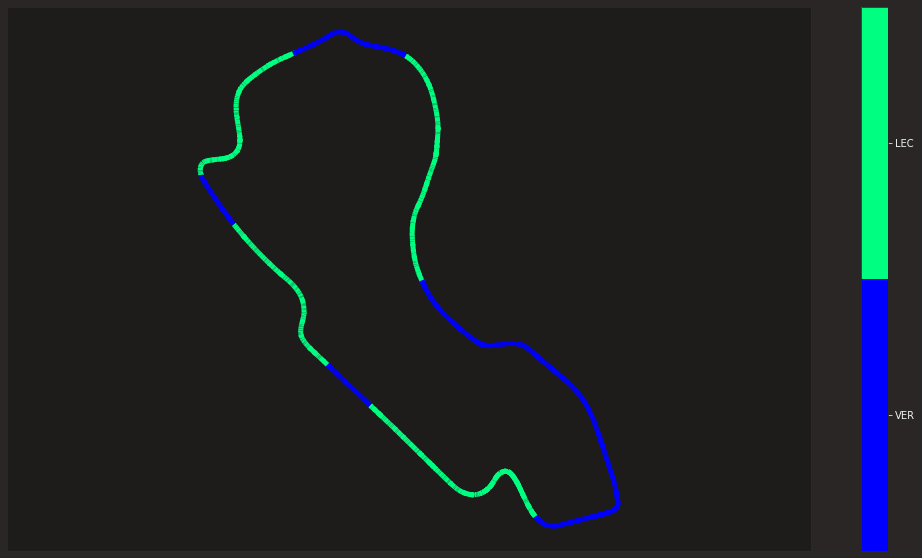

In [11]:
# Setup plotting
plotting.setup_mpl()

# Select the laps from LeClerc and Verstappen
laps_ver = laps.pick_driver('VER')
laps_lec = laps.pick_driver('LEC')

# Get the telemetry data from their fastest lap
fastest_ver = laps_ver.pick_fastest().get_telemetry().add_distance()
fastest_lec = laps_lec.pick_fastest().get_telemetry().add_distance()

# Since the telemetry data does not have a variable that indicates the driver, 
# we need to create that column
fastest_ver['Driver'] = 'VER'
fastest_lec['Driver'] = 'LEC'

# Merge both lap telemetries so we have everything in one DataFrame
telemetry = fastest_ver.append(fastest_lec)

# We want 25 mini-sectors (this can be adjusted up and down)
num_minisectors = 25

# Grab the maximum value of distance that is known in the telemetry
total_distance = total_distance = max(telemetry['Distance'])

# Generate equally sized mini-sectors 
minisector_length = total_distance / num_minisectors

# Initiate minisector variable, with 0 (meters) as a starting point.
minisectors = [0]

# Add multiples of minisector_length to the minisectors
for i in range(0, (num_minisectors - 1)):
    minisectors.append(minisector_length * (i + 1))
    
telemetry['Minisector'] = telemetry['Distance'].apply(
    lambda dist: (
        int((dist // minisector_length) + 1)
    )
)
# Calculate avg. speed per driver per mini sector
average_speed = telemetry.groupby(['Minisector', 'Driver'])['Speed'].mean().reset_index()
#print(average_speed)

# Select the driver with the highest average speed
fastest_driver = average_speed.loc[average_speed.groupby(['Minisector'])['Speed'].idxmax()]

# Get rid of the speed column and rename the driver column
fastest_driver = fastest_driver[['Minisector', 'Driver']].rename(columns={'Driver': 'Fastest_driver'})

# Join the fastest driver per minisector with the full telemetry
telemetry = telemetry.merge(fastest_driver, on=['Minisector'])

# Order the data by distance to make matploblib does not get confused
telemetry = telemetry.sort_values(by=['Distance'])

# Convert driver name to integer
telemetry.loc[telemetry['Fastest_driver'] == 'VER', 'Fastest_driver_int'] = 1
telemetry.loc[telemetry['Fastest_driver'] == 'LEC', 'Fastest_driver_int'] = 2

x = np.array(telemetry['X'].values)
y = np.array(telemetry['Y'].values)

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)
fastest_driver_array = telemetry['Fastest_driver_int'].to_numpy().astype(float)

cmap = cm.get_cmap('winter', 2)
lc_comp = LineCollection(segments, norm=plt.Normalize(1, cmap.N+1), cmap=cmap)
lc_comp
lc_comp.set_array(fastest_driver_array)
lc_comp.set_linewidth(5)

plt.rcParams['figure.figsize'] = [18, 10]

plt.gca().add_collection(lc_comp)
plt.axis('equal')
plt.tick_params(labelleft=False, left=False, labelbottom=False, bottom=False)

cbar = plt.colorbar(mappable=lc_comp, boundaries=np.arange(1,4))
cbar.set_ticks(np.arange(1.5, 9.5))
cbar.set_ticklabels(['VER', 'LEC'])

plt.savefig(f"2022_ver_lec_q_australia.png", dpi=300)

plt.show()
